# Import

---
To prepare for **data loading, preprocessing, and model building,** it's essential to import all necessary modules and **set hyperparameters and constraints**. These parameters will be used throughout the notebook to **ensure consistency and accuracy in the analysis**.

In [2]:
import numpy as np
import pandas as pd

# Data Visualization
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt

# Data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Clustering Models
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

# Data Loading & Processing
---

In [266]:
# Specify the data path
data_path = 'Customers1.csv'

# Read the file 
df = pd.read_csv(data_path)

# Alter
df['Country'] = df['Country'].replace('USA', 'États-Unis')
df['Country'] = df['Country'].replace('India', 'Inde')

# Quick look at the data 
df.head()

,CustomerID,Status,Annual Income ($),Spending Score (1-100),Work Experience,Customer size,Founded,Number of employees,Country
0,1.0,Private,15000.0,39.0,1.0,4.0,1988,3930,Allemagne
1,2.0,Private,35000.0,81.0,3.0,3.0,2018,7871,France
2,3.0,Public,86000.0,6.0,1.0,1.0,2003,3095,Suède
3,4.0,Public,59000.0,77.0,0.0,2.0,1989,5422,Norvège
4,5.0,Public,38000.0,40.0,2.0,6.0,2013,3135,Finlande


## Feature space
---

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              2000 non-null   float64
 1   Status                  2000 non-null   object 
 2   Annual Income ($)       2000 non-null   float64
 3   Spending Score (1-100)  2000 non-null   float64
 4   Work Experience         2000 non-null   float64
 5   Customer size           2000 non-null   float64
 6   Founded                 2000 non-null   int64  
 7   Number of employees     2000 non-null   int64  
 8   Country                 2000 non-null   object 
dtypes: float64(5), int64(2), object(2)
memory usage: 140.8+ KB


In [269]:
df.isnull().sum()

CustomerID                0
Status                    0
Annual Income ($)         0
Spending Score (1-100)    0
Work Experience           0
Customer size             0
Founded                   0
Number of employees       0
Country                   0
dtype: int64

The data under consideration comprises of 2 categorical and 6 numeric features. It is important to note that the presence of null values, particularly in a categorical feature, may require imputation or removal to ensure the integrity and accuracy of subsequent data analyses.
Because this is a categorical column, we will be imputing the value using the mode value.

In [271]:
# Inpute the missing value by the Model Value
# df.Profession.fillna('mode', inplace=True)

# Quick check
# df.isnull().sum()

-

# Data Visualization
----

Data visualization is a process of creating visual representations of data to facilitate the exploration, interpretation, and communication of patterns and relationships within the data. It is a powerful tool for understanding complex data and communicating insights effectively.

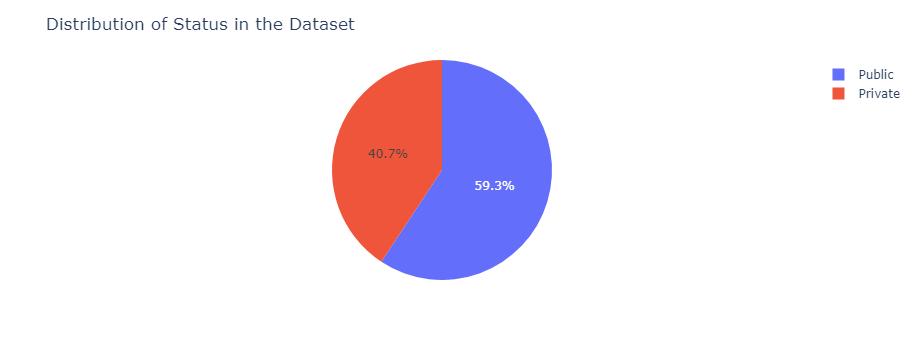

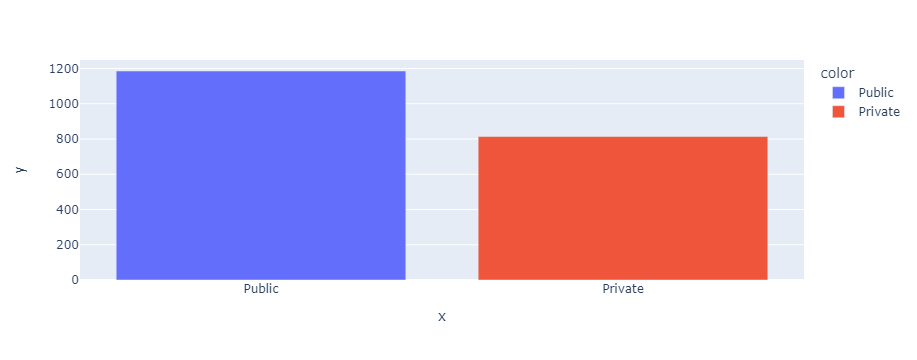

In [275]:
# Obtain the count of each status in the dataset
status_count = df['Status'].value_counts()

# Create a pie chart to visualize the distribution of status in the dataset
fig = px.pie(values=status_count, names=status_count.index)

# Enhance the plot by adding a title and labels
fig.update_layout(title="Distribution of Status in the Dataset")

# Create a bar chart to visualize the distribution of status in the dataset 
fig2 = px.bar(y=status_count, x=status_count.index, color=status_count.index)

# Display the plot
fig.show()
fig2.show()

It is evident from the dataset that the number of public candidates is significantly higher than the number of private candidates, indicating a bias towards the public acndidates. Specifically, the dataset contains around 1,200 public candidates and only approximately 800 private candidates.

It is important to note that such a bias can potentially impact the performance of machine learning models trained on this dataset. This is particularly true if the dataset is used to predict outcomes or make decisions that may be influenced by status.

Let's find out how the status is affecting the other features.

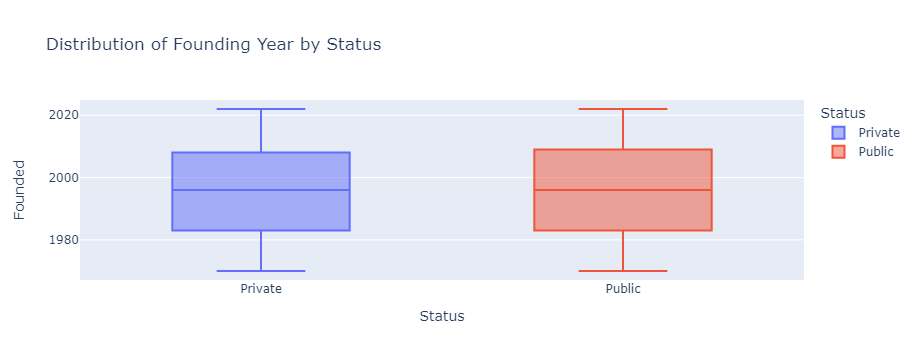

In [277]:
# Create a box plot of Founding Year by Status
status_Founding_Year_boxplot = px.box(df, x='Status', y='Founded', color='Status', title='Distribution of Founding Year by Status')

# Display the plot
status_Founding_Year_boxplot.show()

The box plot provides clear insights into the distribution of founded year by status. From the plot, it is evident that status does not appear to significantly impact the distribution of founded year. Both private and public status have similar founded year distributions with no significant differences.

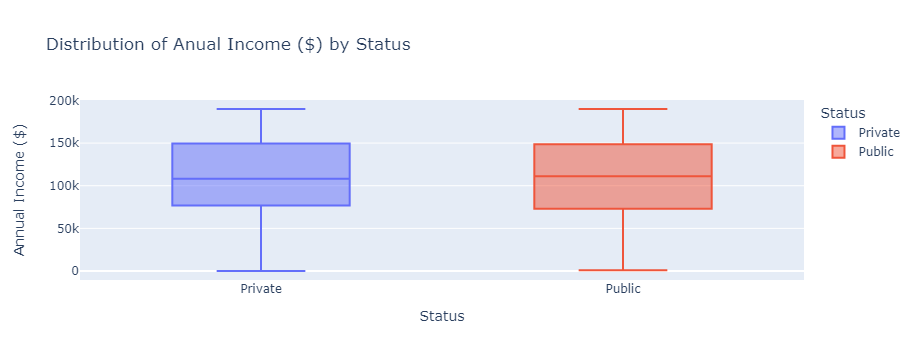

In [279]:
# Create a box plot of Annual Income by Status
anual_income_status_boxplot = px.box(df, x='Status', y='Annual Income ($)', color='Status', title='Distribution of Anual Income ($) by Status')

# Display the plot
anual_income_status_boxplot.show()

The distribution of annual income versus status is similar to the distribution of founded year versus status. There is no significant impact of status on the annual income. And that is really great to be see.


After conducting exploratory data analysis on the "Status" variable, we can conclude that there is no strong correlation between the distribution of status and the other variables. This suggests that status is not a significant factor in predicting the values of other variables. This conclusion is important from a machine learning perspective, as it implies that including status as a variable in a predictive model might not significantly improve accuracy. It also indicates that there may be other, more influential factors in determining the values of these variables. Additional analysis, such as generating a correlation matrix or creating new variables, may be necessary to identify these factors and improve the accuracy of our models.

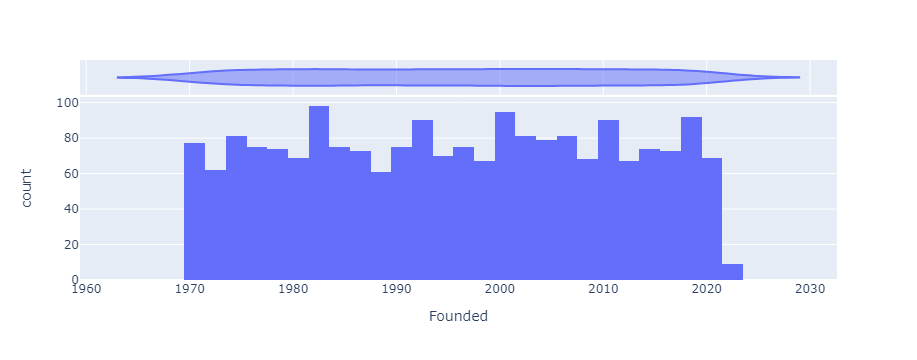

In [282]:
# Create a histogram of the 'Founded' column, and include the Violin plot to show the distribution
fig = px.histogram(df, x='Founded', marginal='violin')

# Display the plot
fig.show()

Upon analyzing the founded year distribution of the dataset, we observe that it is fairly uniform across the entire founded year range, ranging from 1970 to 2023. Despite a small peak in the founded year range of 1982-1983, which deviates slightly from a normal distribution, it still falls within an acceptable range. Thus, from a statistical perspective, we can conclude that the data is not skewed or biased with respect to founded year. 
Furthermore, from a machine learning and deep learning point of view, it is essential to have a balanced dataset that coverslfounded yeae groups to ensure optimal model performance. Therefore, this balanced distribution ofounded yearge can be beneficial for building accurate and robust models that can generalize well on unseen data.

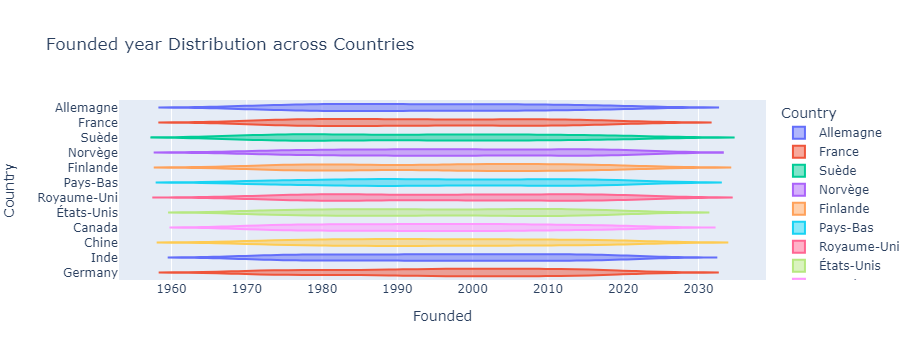

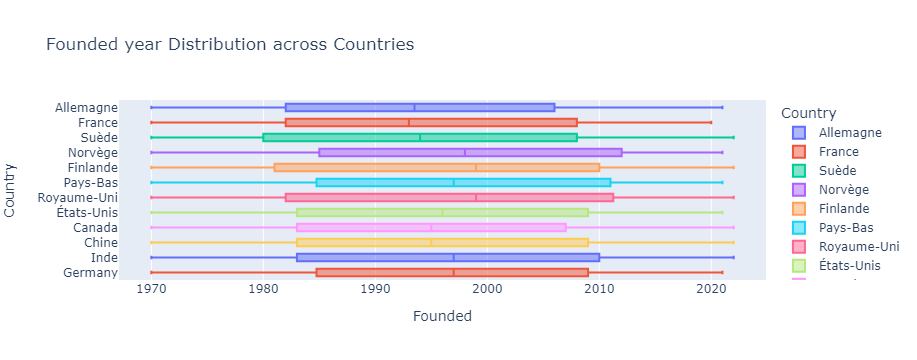

In [284]:
# Create violin plot for founded year versus Country
fig1 = px.violin(df, x='Founded', y='Country', color='Country', title='Founded year Distribution across Countries')

# Create box plot for founded year versus Country
fig2 = px.box(df, x='Founded', y='Country', color='Country', title='Founded year Distribution across Countries')

# Display the plots
fig1.show()
fig2.show()

By examining the founded year distribution of different countries through a violin plot, we can observe that there is no significant difference in the founded year distribution across countries. This is surprising, as one would expect that certain countries might have an founded year bias due to factors such as experience requirements. However, the data suggests otherwise, and it may be the case that the distribution of customers in the dataset is such that each country is equally represented regardless of founded year. This is an interesting finding, and it suggests that founded year may not be a decisive factor in predicting the country of a customer.

Upon analyzing the box plot, it can be inferred that founded year is slightly related to the country(unlike the violin plot). The distribution of founded year for different countries is not uniform and there are variations in the founded year distribution across countries. From a machine learning and deep learning point of view, these observations can be crucial in predicting the country of an individual based on their founded year.

Additionally, it is worth noting that the median of the founded year distribution varies across countries. For instance, the median for norvège is shifted towards the right, indicating that the majority of **Norwegians** are founded in 2012. On the other hand, the mode for **suéde and Finlande** is shifted towards the left, indicating that the majority of individuals in these countries. This information can be valuable in developing marketing strategies for products or services that are specific to a particular founded year group or country.

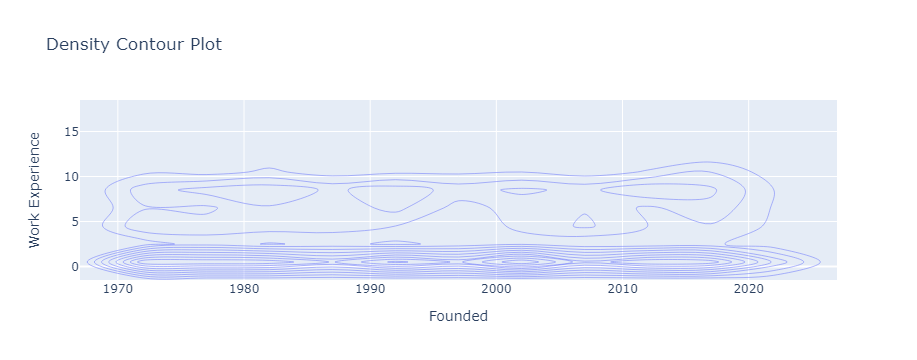

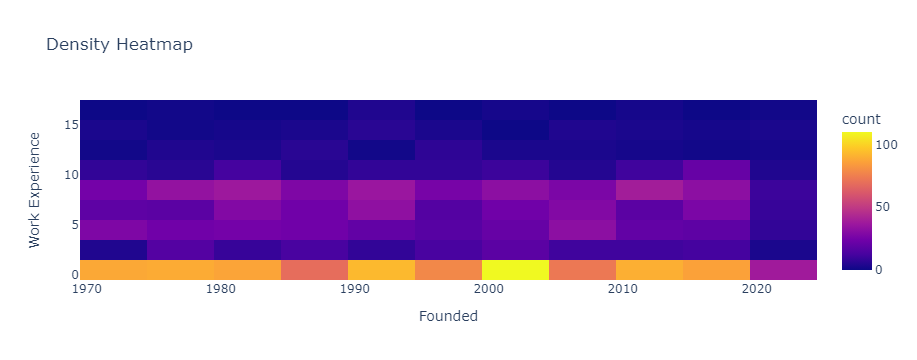

In [287]:
# Create a density contour plot to show the relationship between Founded year and work experience
fig1 = px.density_contour(df, x='Founded', y='Work Experience', title='Density Contour Plot')

# Create a density heatmap to show the distribution of Founded year and work experience
fig2 = px.density_heatmap(df, x='Founded', y='Work Experience', title='Density Heatmap')

# Show the plots
fig1.show()
fig2.show()

The density contour plot between founded year and work experience reveals an interesting trend - work experience does not seem to increase proportionally with founded year. This is not in line with what we would normally expect, where more work experience generally comes with founded year. It's possible that the dataset is too ideal and doesn't accurately reflect the real-world distribution. Alternatively, there may be other factors at play that affect work experience regardless of founded year, such as changes in career paths or education.

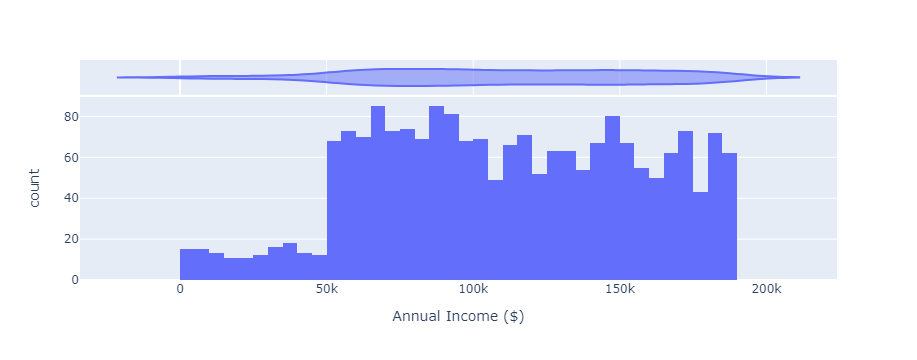

In [289]:
# Create a histogram of the 'Annual Income' column, and include the Violin plot to show the distribution
fig = px.histogram(df, x='Annual Income ($)', marginal='violin')

# Display the plot
fig.show()

Upon analyzing the histogram of the annual income, a conspicuous pattern emerges. Notably, the count of individuals earning between zero to 50,000 is minuscule, amounting to merely 15. The data shows that a substantial shift occurs after the 50,000 mark, where the count skyrockets to around 70. This increasing trend continues in a linear fashion until it reaches the 100,000 mark, after which some fluctuations are observed. These perturbations persist until the income range of 190,000.

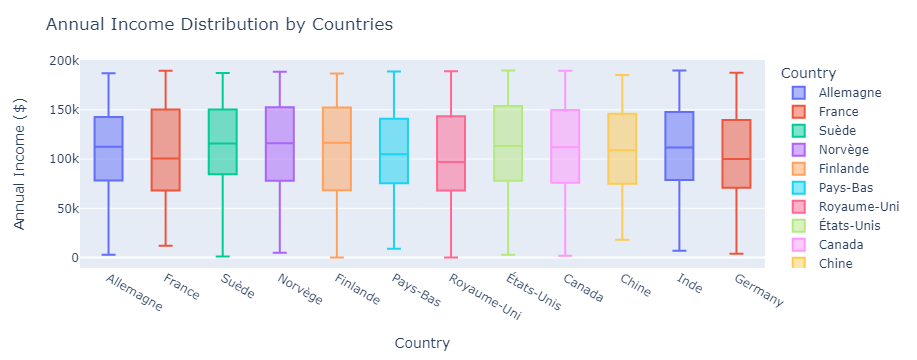

In [291]:
# Create a box plot for annual income grouped by country
fig = px.box(df, y='Annual Income ($)', x='Country', color="Country")

# Set the title of the plot
fig.update_layout(title_text='Annual Income Distribution by Countries')

# Show the plot
fig.show()

Upon further analysis of the relationship between annual income and country, it appears that the distribution of income for certain countries such as Allemagne, suède, norvège, finlande, Etats-unis, canada and india, remains relatively stable. However, there are some notable changes in the distribution of income for individuals in the countries royaume-uni, france and germany, where the lower values tend to shift slightly higher.

Furthermore, the median income for the aforementioned countries remains relatively consistent at approximately 100K, whereas the median income for individuals in the countries royaume-uni, france and germany experiences a slight decrease. On the other hand, finlande experiences a notable change, with the overall distribution of income remaining consistent, yet the median income shifting upwards.

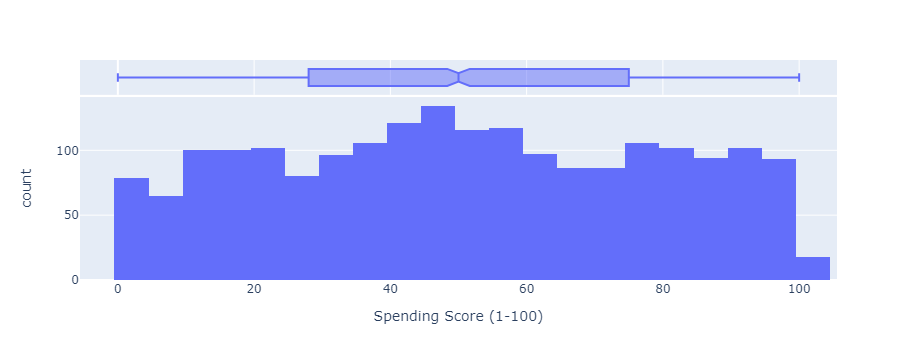

In [293]:
# Create a histogram of the 'Spending Score' column, and include the Violin plot to show the distribution
fig = px.histogram(df, x='Spending Score (1-100)', marginal='box')

# Display the plot
fig.show()

Upon examining the histogram of the spending score, it becomes apparent that the frequency counts are roughly consistent throughout. However, there exists a notable peak in the frequency count within the range of 45 to 49 in the spending score. This peak exhibits a gradual incline. As we progress towards the end of the histogram, the frequency count experiences an extreme decline, dropping to a mere 18. The initial frequency count stood around 80 and peaked at 134 before dropping to 18, marking a significant variation in the counts. Despite these fluctuations, the distribution maintains a consistent trend, gradually shifting upwards and downwards.

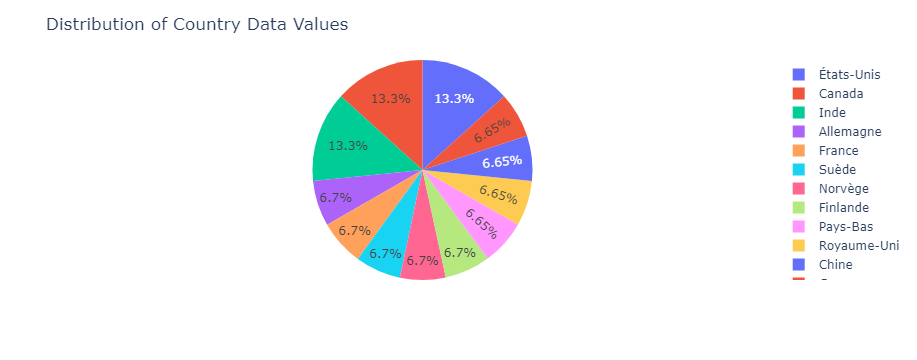

In [295]:
# Extracting the count of each country from the dataframe and storing in country_dis
country_dis = df.Country.value_counts()

# Extracting the names of each country from the country_dis index
names = country_dis.index

# Creating a pie chart to visualize the distribution of country data values
fig = px.pie(values=country_dis, names=names, color=names)

# Setting the title of the plot
fig.update_layout(title_text='Distribution of Country Data Values')

# Displaying the plot
fig.show()

The chart presents the distribution of clients across different countries. It shows that the percentage of clients is almost evenly distributed among the countries, with some minor variations. The three countries with the largest share of clients, each accounting for about 13%, are the United States, Canada, and India. This indicates that these three countries represent a significant portion of the total clientele.

Next, countries such as Germany, France, Sweden, and Norway each make up about 6.7%, forming the second largest group of clients. This suggests a notable presence of clients in these regions, although less compared to the top three countries.

Other countries, including Germany (listed twice), China, the United Kingdom, and the Netherlands, also account for around 6.65% of the total clientele. Although their percentage is slightly lower than that of the second group, they still represent a significant portion of the global market.

In summary, the distribution of clients shows a strong concentration in a few key countries like the United States, Canada, and India, while other countries form relatively balanced groups with moderate presence.

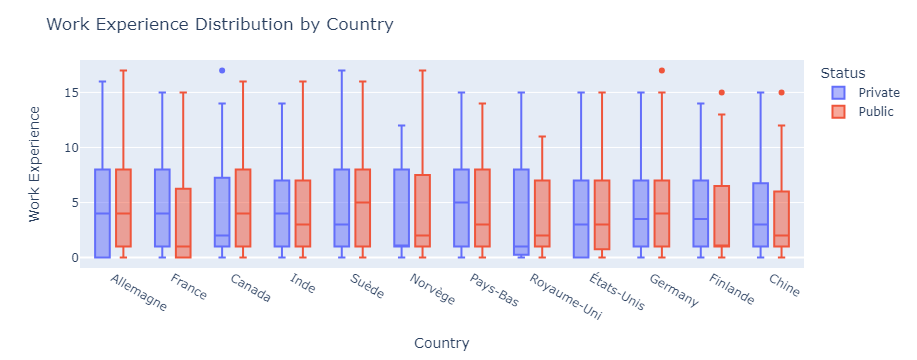

In [297]:
# Create a box plot for Work Experience grouped by country
fig = px.box(df, y='Work Experience', x='Country', color="Status")

# Set the title of the plot
fig.update_layout(title_text='Work Experience Distribution by Country')

# Show the plot
fig.show()

The box plot highlights the distribution of work experience across different countries, distinguishing between the public and private sectors. In Germany, the public sector shows a range of experience up to 17 years, with a median of about 4 years, suggesting a certain level of stability. The private sector in Germany has a slightly shorter range, up to 16 years, but shares the same median of 4 years. This indicates a consistency in experience levels across both sectors, with relatively similar career lengths.

In France, there is a notable difference between sectors. The public sector has a range of up to 15 years but a median experience of only 1 year. This suggests a rapid entry of new workers and potentially high turnover. In contrast, the private sector in France also has a maximum range of 15 years but a higher median of 4 years. This indicates greater job stability in the private sector, where employees tend to accumulate more experience before changing positions or sectors.

In Canada, the public sector has a range of experience up to 16 years, with a median of 4 years, reflecting some stability in public sector careers. However, the private sector in Canada has an even wider range, extending up to 17 years, but with a lower median of 2 years. This could indicate a diversity of experience levels in the private sector, with both newcomers and highly experienced professionals. In India, the public sector has a range of experience up to 16 years, with a median of 3 years, while the private sector shows a slightly shorter maximum range of 14 years but a higher median of 4 years, suggesting that the private sector in India might offer longer and more stable career opportunities.

In Sweden, the public sector stands out with a range of experience up to 16 years, and a median of 5 years, reflecting strong job stability. Conversely, the Swedish private sector has a slightly wider range up to 17 years, but a lower median of 3 years, suggesting a more diverse workforce in terms of experience levels. In Norway, the situation is reversed; the public sector reaches up to 17 years but has a relatively low median of 2 years, indicating a high variation in experience levels among public sector workers. The Norwegian private sector has a shorter maximum range of 12 years, with an even lower median of 1 year.

In the Netherlands, the public sector shows a range of experience up to 14 years, with a median of 3 years, while the private sector reaches a range of 15 years but with a higher median of 5 years. This suggests that the Dutch private sector might offer longer and more stable careers. In the UK, the public sector has a range up to 11 years, with a low median of 2 years, while the private sector extends up to 15 years, but with a median of only 1 year, possibly reflecting high mobility in both sectors, particularly in the private sector.

In the US, both sectors show similar distributions, with the public sector reaching up to 15 years and a median of 3 years, and the private sector having a similar range and median. This suggests some uniformity in the duration of work experience across sectors. In Finland, the public sector shows a range up to 13 years, with a relatively low median of 1 year, possibly indicating high turnover. However, the private sector has a slightly longer range up to 14 years, with a higher median of 4 years, suggesting greater job stability.

Finally, in China, the public sector shows a range up to 12 years, with a median of 2 years, which may indicate a relatively young workforce or higher turnover. The private sector in China has a longer maximum range up to 15 years, with a median of 3 years, suggesting somewhat longer and more stable careers in the private sector.

In summary, these data reveal a variety of trends in the distribution of work experience across different countries and sectors. Some countries, such as Sweden and Canada, show greater stability in the public sector, while others, like India and China, indicate more pronounced differences between the public and private sectors. This highlights how employment policies, work culture, and labor market dynamics can influence the duration and stability of work experience in different national and sectoral contexts.

# Data Preprocessing

Now that we have a good understanding of how the data is distributed and what insights it represents, we can move on to the crucial step of data preprocessing. This step involves cleaning and transforming the data to prepare it for analysis.

To start with data preprocessing, we need to first address the categorical columns in the dataset. Since most machine learning models work with numeric data, we need to convert categorical data into numeric values. One way to do this is by using the Label Encoder from the scikit-learn library, which assigns a unique numerical label to each category in a column. This process allows us to represent categorical data as a sequence of numbers that can be easily processed by machine learning algorithms.

In [301]:
# define the categorical columns.
categorical_columns = ['Status', 'Country']

# define the remarkable columns.
numerical_columns = ['Founded', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Customer Size', 'Number of employees']

In [302]:
# Convert or categorical columns to numerical columns.
for cat_col in categorical_columns:
    
    # Initialise label encoder.
    encoder = LabelEncoder()
    
    # Apply transformation.
    df[cat_col] = encoder.fit_transform(df[cat_col])

In [303]:
df.head()


,CustomerID,Status,Annual Income ($),Spending Score (1-100),Work Experience,Customer size,Founded,Number of employees,Country
0,1.0,0,15000.0,39.0,1.0,4.0,1988,3930,0
1,2.0,0,35000.0,81.0,3.0,3.0,2018,7871,4
2,3.0,1,86000.0,6.0,1.0,1.0,2003,3095,10
3,4.0,1,59000.0,77.0,0.0,2.0,1989,5422,7
4,5.0,1,38000.0,40.0,2.0,6.0,2013,3135,3


It is recommended to perform feature scaling on the dataset to bring all the feature columns to a standard range. This is because the current range of each feature column is different from the other feature columns, which can have a significant impact on the model's performance. To achieve this, the standard scaler can be used, which is a popular method for scaling numerical data.

In [305]:
# Initialise standard scalar.
scaler = StandardScaler()

# Rescaled data.
df.drop(columns=['CustomerID'], inplace=True)
full_data = scaler.fit_transform(df)

In [306]:
# Quick Look
full_data[:5]

array([[-1.20706357, -2.09350095, -0.42833854, -0.79120713,  0.11749744,
        -0.52170922, -0.36911921, -1.55828621],
       [-1.20706357, -1.65613312,  1.07554599, -0.28116224, -0.39005088,
         1.48062898,  0.99416844, -0.44482697],
       [ 0.82845678, -0.54084515, -1.6099621 , -0.79120713, -1.40514752,
         0.47945988, -0.657966  ,  1.22536189],
       [ 0.82845678, -1.13129172,  0.93231889, -1.04622958, -0.8975992 ,
        -0.45496461,  0.14699984,  0.39026746],
       [ 0.82845678, -1.59052794, -0.39253176, -0.53618469,  1.13259408,
         1.14690594, -0.64412903, -0.72319178]])

**We have completed the necessary pre processing steps. Now we can move towards model building.**

# Data Correlation

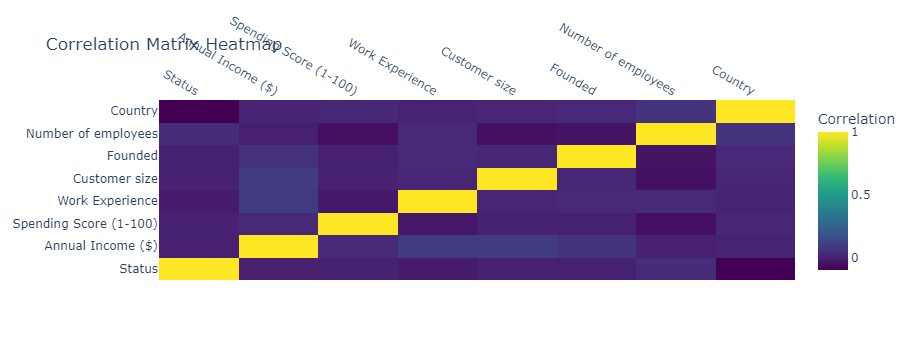

In [309]:
# Calculate correlation
corr = df.corr()

# Create the correlation matrix heatmap
fig = go.Figure(data=go.Heatmap(
                   z=corr.values,
                   x=corr.columns,
                   y=corr.columns,
                   colorscale='Viridis',
                   colorbar=dict(title='Correlation')))

# Update heatmap layout
fig.update_layout(title='Correlation Matrix Heatmap',
                  xaxis=dict(side='top'))

# Show the figure
fig.show()

Certainly. From the correlation matrix, we can observe that there are no strong correlations between the features in the dataset. There are neither significant positive nor negative correlations present, and the values between each pair of features are close to zero. This indicates that the features in the data are not correlated with each other, which could pose a problem for the dataset. It might make it challenging for a model to accurately identify clusters or patterns within the data.

This lack of correlation is not typically observed in real-world datasets. In practical scenarios, features are usually more interconnected, and a correlation matrix often displays stronger positive or negative correlations between features. This suggests that there might be underlying factors affecting the data that we have not yet considered. To better understand the data and improve our results, we might need to perform more in-depth exploratory analysis and feature engineering to uncover these factors.

# Principal Component Analysis

PCA (Principal Component Analysis) is a statistical technique used to simplify complex data sets by reducing the number of variables while retaining the important information. It is a popular technique in data analysis and machine learning for feature extraction, dimensionality reduction, and data visualization.

The goal of PCA is to identify the patterns in high-dimensional data by identifying a new set of variables, called principal components, that account for most of the variance in the data. These components are linear combinations of the original variables and are computed in such a way that the first principal component has the highest possible variance, and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components.

PCA works by finding the eigenvectors and eigenvalues of the covariance matrix of the data. The eigenvectors represent the directions of maximum variance in the data, and the eigenvalues represent the amount of variance explained by each eigenvector. The eigenvectors with the highest eigenvalues are the principal components.

By projecting the data onto the principal components, we can obtain a lower-dimensional representation of the data that captures most of the important information. This can be useful for visualization, as it allows us to plot the data in two or three dimensions, which can be easier to interpret than high-dimensional data. It can also be useful for reducing the dimensionality of the data before applying other machine learning algorithms, as it can help to reduce overfitting and improve computational efficiency.

In [313]:
# Instantiate a PCA object with 2 components for 2D data
pca_2D = PCA(n_components=2, random_state=42)

# Fit and transform the data to obtain the 2D projection
data_2D = pca_2D.fit_transform(full_data)


# Instantiate a PCA object with 3 components for 3D data
pca_3D = PCA(n_components=3, random_state=42)

# Fit and transform the data to obtain the 3D projection
data_3D = pca_3D.fit_transform(full_data)

# K-Means Clustering

K-means clustering is a popular unsupervised machine learning algorithm that aims to group similar data points together in a dataset. The algorithm takes in a dataset and the desired number of clusters (k), then it randomly selects k data points to serve as the initial centroids for the clusters. It then assigns each data point in the dataset to the nearest centroid, creating k clusters.

Next, the algorithm computes the mean (center) of each cluster and moves the centroid to this new location. It then re-assigns each data point to the nearest centroid again, and repeats the process of computing new cluster means and re-assigning data points until the centroids no longer move or a maximum number of iterations is reached.

The output of the K-means algorithm is the final centroids and the assignment of each data point to its corresponding cluster. The goal of the algorithm is to minimize the sum of squared distances between each data point and its assigned centroid, known as the Within-Cluster Sum of Squares (WCSS).

Here we are not sure about the correct number of clusters, so we will have to find the best possible value of "K"

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

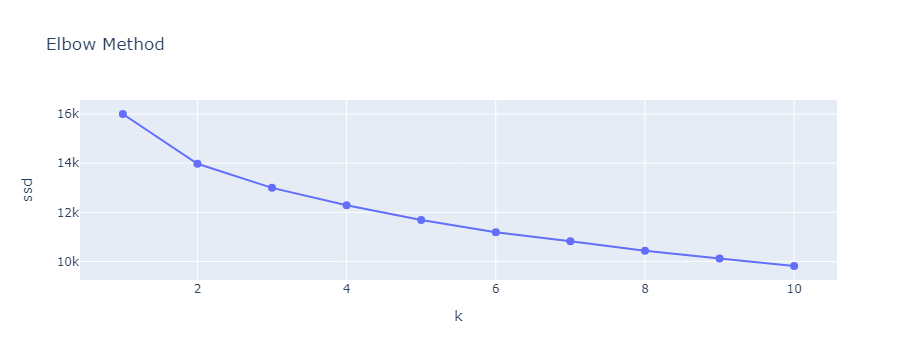

In [317]:
# create a list to store the sum of squared distances for each k
ssd = []

# fit KMeans clustering with different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(full_data)
    ssd.append(kmeans.inertia_)

# create a dataframe with the k values and corresponding ssd
df = pd.DataFrame({'k': range(1, 11), 'ssd': ssd})

# create the line plot using Plotly Express
fig = px.line(df, x='k', y='ssd', title='Elbow Method')
fig.update_traces(mode='markers+lines', marker=dict(size=8))
fig.show()

## Elbow Method

The Elbow method is a heuristic used to determine the optimal number of clusters to use in a K-means clustering algorithm. The method involves plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use. The explained variation is defined as the Sum of Squared Distances between the data points and their assigned cluster centers, also known as the Within-Cluster Sum of Squares (WCSS).

The intuition behind the Elbow method is that as the number of clusters increases, the WCSS will generally decrease because each data point will be closer to its assigned cluster center. However, beyond a certain point, the marginal gain in WCSS reduction will start to diminish, resulting in a flattening of the curve. This point of flattening is referred to as the "elbow," and it represents the optimal number of clusters to use.

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

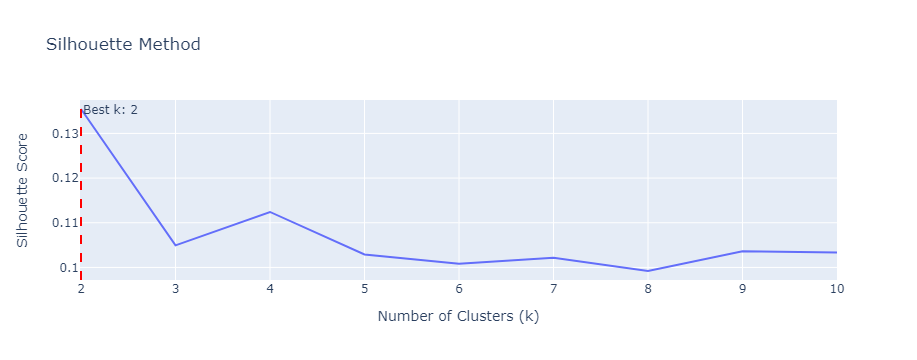

In [320]:
# create a list to store the silhouette scores for each k
silhouette_scores = []

# fit KMeans clustering with different values of k
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(full_data)
    silhouette_avg = silhouette_score(full_data, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# find the k with the highest silhouette score
best_k = np.argmax(silhouette_scores) + 2

# plot the silhouette scores vs k
fig = px.line(x=range(2, 11), y=silhouette_scores, title='Silhouette Method')
fig.update_layout(xaxis_title='Number of Clusters (k)', yaxis_title='Silhouette Score')
fig.add_vline(x=best_k, line_dash='dash', line_color='red', annotation_text=f'Best k: {best_k}')
fig.show()

## Silhouette Method

The Silhouette Method is a technique for evaluating the performance of clustering algorithms. It measures how similar a data point is to its own cluster compared to other clusters. It provides a score for each data point, which ranges from -1 to 1, where:

A score of 1 indicates that the data point is well-matched to its own cluster,
A score of 0 indicates that the data point is on the boundary between two clusters,
A score of -1 indicates that the data point is probably assigned to the wrong cluster.
The Silhouette score for a clustering solution is calculated by averaging the Silhouette scores for each data point in the dataset. The higher the average Silhouette score, the better the clustering solution.

The Silhouette Method involves calculating the Silhouette score for different values of the number of clusters, k. The optimal number of clusters is chosen based on the highest Silhouette score. The Silhouette Method can be used in conjunction with the Elbow Method to determine the best number of clusters for a given dataset.

The Silhouette score for a single data point i is calculated as follows:

Compute the average distance between i and all other points in its cluster. Denote this value as a(i).
Compute the average distance between i and all other points in the nearest neighboring cluster. Denote this value as b(i).
Calculate the silhouette score for i as s(i) = (b(i) - a(i)) / max(a(i), b(i))
The overall Silhouette score for a clustering solution is the average of all Silhouette scores for each data point.

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

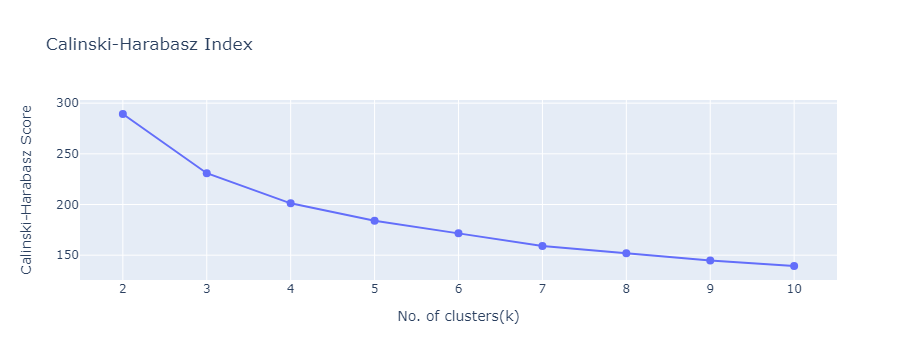

In [323]:
# create a list to store the Calinski-Harabasz scores for each k
scores = []

# fit KMeans clustering with different values of k
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(full_data)
    score = calinski_harabasz_score(full_data, kmeans.labels_)
    scores.append(score)

# create a dataframe with the k values and corresponding scores
df = pd.DataFrame({'No. of clusters(k)': range(2, 11), 'Calinski-Harabasz Score': scores})

# create the line plot using Plotly Express
fig = px.line(df, x='No. of clusters(k)', y='Calinski-Harabasz Score', title='Calinski-Harabasz Index')
fig.update_traces(mode='markers+lines', marker=dict(size=8))
fig.show()

## Calinski-Harabasz Index

The Calinski-Harabasz Index, also known as the Variance Ratio Criterion, is a clustering evaluation metric that aims to measure the ratio between the within-cluster dispersion and the between-cluster dispersion.

The within-cluster dispersion refers to the average distance between each data point in a cluster and the centroid of that cluster. The between-cluster dispersion, on the other hand, refers to the average distance between the centroids of each cluster.

The Calinski-Harabasz Index tries to maximize the ratio between the between-cluster dispersion and the within-cluster dispersion. A higher value of the Calinski-Harabasz Index indicates a better clustering solution.

In practice, the Calinski-Harabasz Index can be used together with other clustering evaluation metrics, such as the Silhouette Coefficient and the Elbow Method, to determine the optimal number of clusters for a given dataset.

Based on all the scores obtained, we can say that 2 is the best value for K(number of clusters).

In [327]:
# KMeans Clustering 
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the KMeans model on train_ds
kmeans.fit(full_data)

# Obtain cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



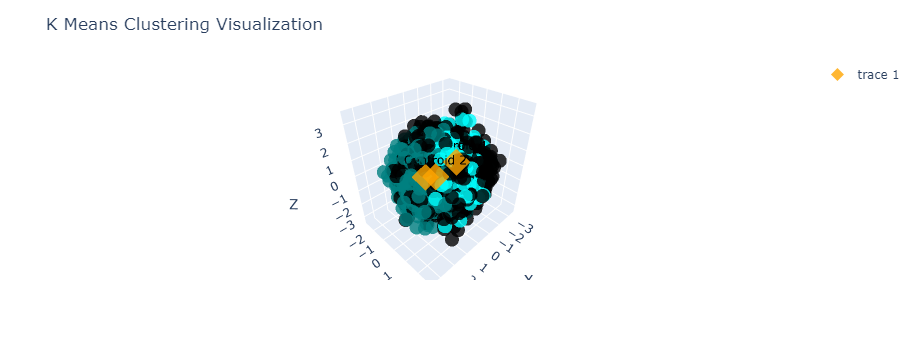

In [328]:
# Create the 3D scatter plot
fig = px.scatter_3d(
    x=data_3D[:, 0], y=data_3D[:, 1], z=data_3D[:, 2], 
    color=labels,
    size_max=5, 
    opacity=0.8,
    labels={'x':'X', 'y':'Y', 'z':'Z'},
    color_continuous_scale=['black', 'cyan'])

# Add a trace for the cluster centers
fig.add_trace(
    go.Scatter3d(
        x=centroids[:,0],
        y=centroids[:,1],
        z=centroids[:,2],
        mode='markers+text',
        text=['Centroid 1', 'Centroid 2'],
        marker=dict(
            size=10,
            color='orange',
            opacity=0.8,
            symbol='diamond'
        )
    )
)

# Update the layout
fig.update_layout(
    coloraxis_showscale=False,
    title='K Means Clustering Visualization'
)

# Show the plot
fig.show()

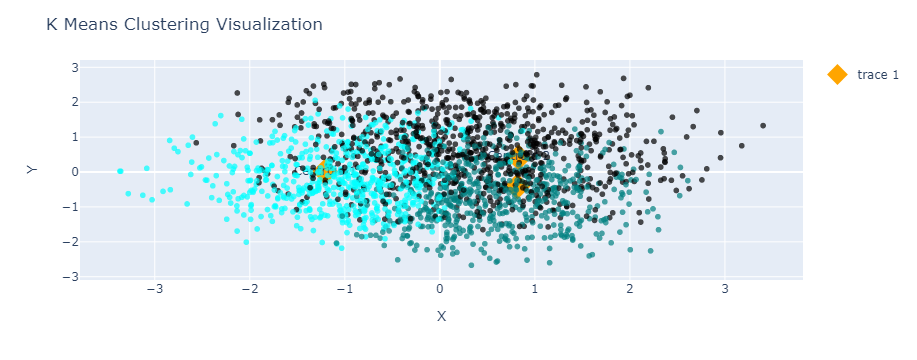

In [329]:
# Create the 2D scatter plot
fig = px.scatter(
    x=data_2D[:, 0], y=data_2D[:, 1],
    color=labels,
    size_max=5, 
    opacity=0.7,
    labels={'x':'X', 'y':'Y'},
    color_continuous_scale=['black', 'cyan'])

# Add a trace for the cluster centers
fig.add_trace(
    go.Scatter(
        x=centroids[:,0],
        y=centroids[:,1],
        mode='markers+text',
        text=['Centroid 1', 'Centroid 2'],
        marker=dict(
            size=20,
            color='orange',
            opacity=1.0,
            symbol='diamond'
        )
    )
)

# Update the layout
fig.update_layout(
    coloraxis_showscale=False,
    title='K Means Clustering Visualization'
)

# Show the plot
fig.show()

Based on the results of the K-means clustering algorithm, we can deduce that it struggled to effectively group the data points, with only three centroids identified. By visualizing these centroids in both three-dimensional and two-dimensional spaces, we can see that the clusters lack clear boundaries and are not well-separated.

Instead, the clusters appear to be mixed, indicating that the algorithm failed to capture the underlying structure of the data. Although it is promising to find at least two clusters in the high-dimensional feature space, we must acknowledge that the data may not accurately represent reality due to a lack of diversity.

# DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups together points that are close to each other based on a density criterion. It is particularly useful for discovering clusters of arbitrary shape in datasets that contain noise or outliers.

The algorithm works by defining a neighborhood around each point in the dataset based on a specified radius called epsilon. Points that have a minimum number of neighbors within this radius are considered as "core points". Core points are then used to form clusters, and non-core points that fall within the radius of a core point are assigned to the same cluster. Points that do not belong to any cluster are considered as noise.

DBSCAN has two important parameters: epsilon and min_samples.

Epsilon defines the radius of the neighborhood around each point.
min_samples determines the minimum number of points required to form a dense region. These parameters can be tuned to achieve the desired clustering results.
One of the main advantages of DBSCAN is that it does not require the number of clusters to be specified in advance, and it is robust to noise and outliers.

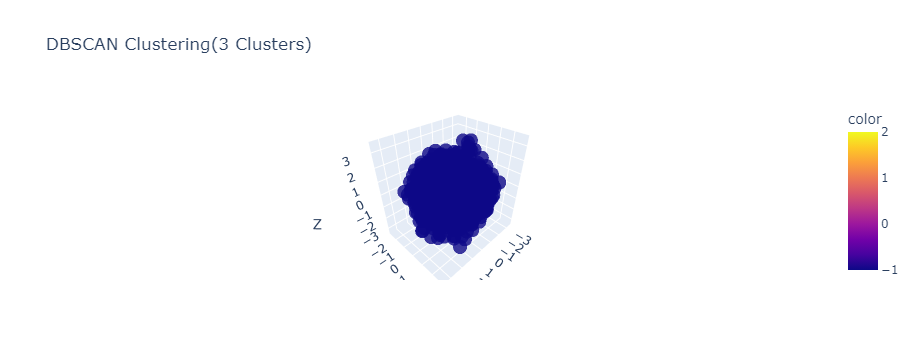

In [333]:
from sklearn.cluster import DBSCAN

# Perform DBSCAN clustering
model = DBSCAN(eps=0.73, min_samples=3)
model.fit(full_data)

# Obtail labels
labels = model.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)          # -1 stands for noise in the data i.e. outliers

# Create the 3D scatter plot
fig = px.scatter_3d(
    x=data_3D[:, 0], y=data_3D[:, 1], z=data_3D[:, 2], 
    color=labels,
    color_discrete_sequence=px.colors.qualitative.Alphabet,
    size_max=5, 
    opacity=0.8,
    labels={'x':'X', 'y':'Y', 'z':'Z'},
    title=f'DBSCAN Clustering({n_clusters} Clusters)')

# Show the plot
fig.show()

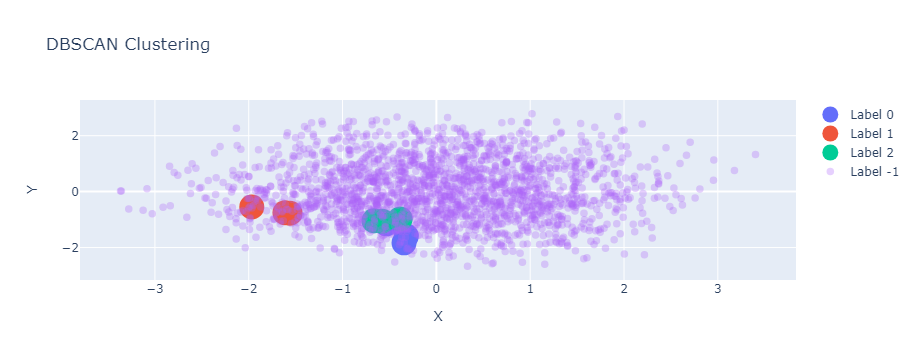

In [334]:
# Define the labels and their corresponding opacity values
label_opacity = {
    0: 1.0,        # opacity for label 0
    1: 1.0,        # opacity for label 1
    2: 1.0,        # opacity for label 2
    3: 1.0,        # opacity for label 3
    -1: 0.3        # opacity for label -1
}

# Create separate traces for each label with the corresponding opacity values
traces = []
for label in set(labels):
    opacity = label_opacity[label]
    mask = labels == label
    trace = go.Scatter(
        x=data_2D[mask, 0], y=data_2D[mask, 1],
        mode='markers',
        marker=dict(
            size=5*(opacity*5),
            opacity=opacity
        ),
        name=f'Label {label}'
    )
    traces.append(trace)

# Create the plot
fig = go.Figure(data=traces, layout=go.Layout(
    title='DBSCAN Clustering',
    xaxis_title='X',
    yaxis_title='Y'
))

# Show the plot
fig.show()

y.

According to the DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm, with conditions set to **DBSCAN(eps=0.73, min_samples=3)**, the graph identifies three distinct clusters, represented by the colors blue (Label 0), red (Label 1), and green (Label 2). The points in purple (Label -1) are considered noise, meaning they do not belong to a clearly defined cluster.
**
Interpretation of Cluste**rs
Cluster 0 (Blue): This cluster is mainly located towards the right center of the graph. It contains a moderate number of points that are relatively dense, suggesting a region in the data space where points are close enough to each other to be grouped together**.

Cluster 1 (** ed): Positioned towards the left side of the graph, the points in this cluster are in a slightly less dense area compared to the blue cluster. This indicates a less compact region but still recognized as a cluster by the DBSCAN algorit**hm.

Cluster 2 (**Green): Also near the center but slightly offset from the blue cluster, this cluster has points that seem closer together, forming a small, dense region. This demonstrates DBSCAN's ability to identify densely populated areas in different regions of the s**pace.

Noise Points (**Label -1)
The points in purple scattered throughout the graph represent noise. These points are considered anomalies or isolated data points as they are not close enough to other points to be included in any of the identified clusters. DBSCAN effectively marks these points independently, highlighting one of the algorithm's distinctive features: its ability to handl**e noise**.

Summary
The graph reveals the presence of three distinct zones of high density within the data, as well as a set of isolated points. DBSCAN has successfully identified these clusters of varying shapes while also recognizing points that do not conform to the expected density in the dataset.